<a href="https://colab.research.google.com/github/lauren1turner/DS4002_LAM/blob/main/PSNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

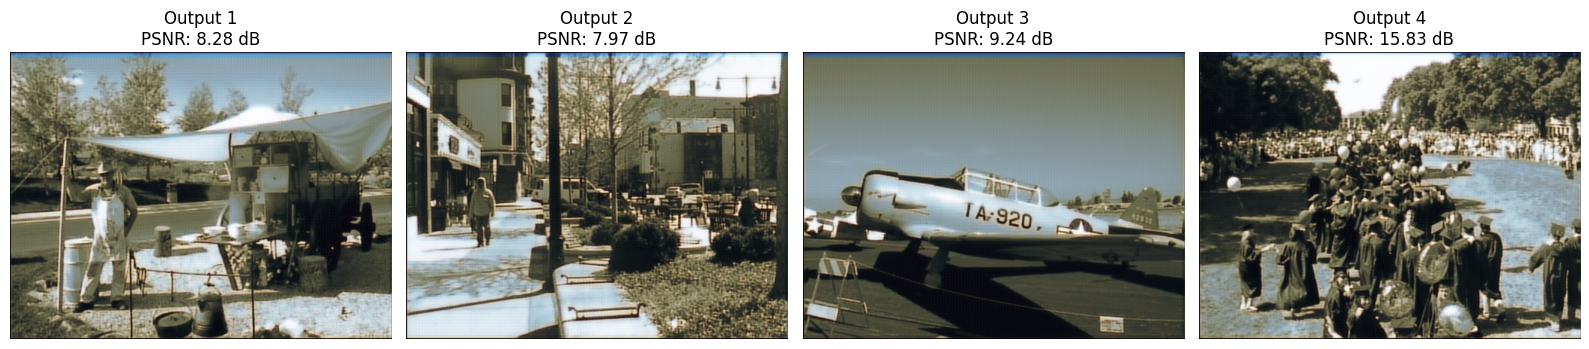

In [ ]:

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

# Load the 4-in-1 pix2pix output and the original RGB image
combined_img = Image.open('/content/fake_epoch_20.png').convert("RGB")
gt_img = Image.open('/content/image-174-a.jpg').convert("RGB")

# Resize ground truth if necessary
if combined_img.height != gt_img.height:
    gt_img = gt_img.resize((gt_img.width, combined_img.height))

# Convert to numpy
combined_np = np.array(combined_img)
gt_np = np.array(gt_img).astype(np.float32)

# Split into 4 equal outputs
h, w, _ = combined_np.shape
w_single = w // 4

outputs = []
for i in range(4):
    out = combined_np[:, i*w_single:(i+1)*w_single].astype(np.float32)
    # Resize ground truth to match each output width
    gt_resized = cv2.resize(gt_np, (w_single, h))
    outputs.append((out, gt_resized))

# Function to compute PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# Compute PSNRs and visualize
plt.figure(figsize=(16, 4))
for i, (output, gt_resized) in enumerate(outputs):
    psnr = calculate_psnr(output, gt_resized)
    plt.subplot(1, 4, i+1)
    plt.imshow(output.astype(np.uint8))
    plt.title(f"Output {i+1}\nPSNR: {psnr:.2f} dB")
    plt.axis('off')
plt.tight_layout()
plt.show()


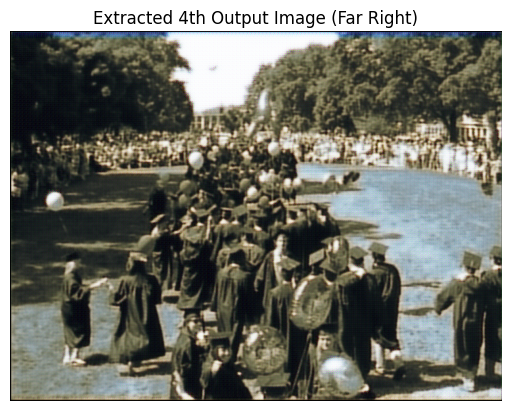

In [ ]:
output = combined_np[:, 3*w_single:4*w_single].astype(np.float32)
output

from PIL import Image
import matplotlib.pyplot as plt

# Display the extracted 4th image
plt.imshow(output.astype(np.uint8))
plt.title("Extracted 4th Output Image (Far Right)")
plt.axis('off')
plt.show()


PSNR for right image: 11.98 dB


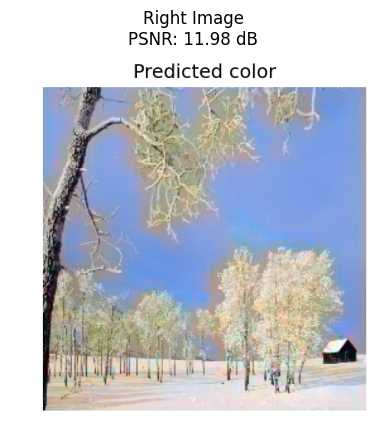

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

# Load images
combined_img = Image.open('/content/colorized_005.png').convert("RGB")
gt_img = Image.open('/content/image-193-a.jpg').convert("RGB")

# Match height if necessary
if combined_img.height != gt_img.height:
    gt_img = gt_img.resize((gt_img.width, combined_img.height))

# Convert to numpy arrays
combined_np = np.array(combined_img)
gt_np = np.array(gt_img).astype(np.float32)

# Split into 2 parts
h, w, _ = combined_np.shape
w_half = w // 2

# Extract right image
right_output = combined_np[:, w_half:].astype(np.float32)

# Resize ground truth to match right image's dimensions
gt_resized = cv2.resize(gt_np, (right_output.shape[1], right_output.shape[0]))

# PSNR function
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# Calculate PSNR
psnr = calculate_psnr(right_output, gt_resized)
print(f"PSNR for right image: {psnr:.2f} dB")

# Show the image
plt.imshow(right_output.astype(np.uint8))
plt.title(f"Right Image\nPSNR: {psnr:.2f} dB")
plt.axis('off')
plt.show()

